In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


DATA CLEANING

In [4]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df = df.rename({'v1':'diagnosis','v2':'message'},axis=1)

In [7]:
df.columns

Index(['diagnosis', 'message'], dtype='object')

In [8]:
df.head()

,diagnosis,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


FEATURE ENGINEERING

In [9]:
import re

In [10]:
separators = [',' , ' ' , ';' , '+' , '-' , '!' , '?' , '&' , '$' , '_' , '@' , '/' , ':']
def count_words(message):
  for char in separators:
    message = message.replace(char,' ')
  words = message.split()
  return len(words)

In [11]:
df['message_length'] = df['message'].apply(lambda x: count_words(x))

In [12]:
symbols = r'[^a-zA-Z0-9]'
def symbols_count(message):
  count = len(re.findall(symbols,message))
  return count

In [13]:
df['symbol_density'] = df['message'].apply(lambda x:symbols_count(x))/df['message_length']

In [14]:
currency= r'[$€¥₹£]+'
def currency_count(message):
  list_currencies = re.findall(currency,message)
  return len(list_currencies)

In [15]:
df['currency_count'] = df['message'].apply(lambda x : currency_count(x))

In [16]:
digits = r'[0-9]'
def digit_count(message):
  list_digits = re.findall(digits,message)
  return len(list_digits)

In [17]:
df['digit_density'] = df['message'].apply(lambda x : digit_count(x))/df['message_length']

In [18]:
capital = r'[A-Z]+'
def capital_group(message):
  list_capital_groups = re.findall(capital,message)
  return len(list_capital_groups)

In [19]:
df['caps_group_count'] = df['message'].apply(lambda x:capital_group(x))

In [20]:
urgent_words = ['free','cash','urgent','account','winner','prize','transfer','reply','verify','now','claim','call','won','discount','deal','investment','congrats','congratulations','jackpot','chosen','service','customer','support','bank','loan','credit','bonus','voucher','gift','profit','refund','limited','click','visit','apply','login','register','update']
def urgent_word_count(message):
  pattern = r'\b(' + '|'.join(urgent_words) + r')\b'
  list_pattern = re.findall(pattern,message,flags=re.IGNORECASE)
  return len(list_pattern)

In [21]:
df['urgent_word_count'] = df['message'].apply(lambda x:urgent_word_count(x))

In [22]:
df.head()

,diagnosis,message,message_length,symbol_density,currency_count,digit_density,caps_group_count,urgent_word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,1.400000,0,0.000000,3,0
1,ham,Ok lar... Joking wif u oni...,6,1.833333,0,0.000000,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,29,1.137931,0,0.862069,8,2
3,ham,U dun say so early hor... U c already then say...,11,1.454545,0,0.000000,2,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,1.076923,0,0.000000,2,0


In [23]:
df.columns

Index(['diagnosis', 'message', 'message_length', 'symbol_density',
       'currency_count', 'digit_density', 'caps_group_count',
       'urgent_word_count'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [26]:
X = df.drop(columns=['diagnosis'])

In [27]:
X

,message,message_length,symbol_density,currency_count,digit_density,caps_group_count,urgent_word_count
0,"Go until jurong point, crazy.. Available only ...",20,1.400000,0,0.000000,3,0
1,Ok lar... Joking wif u oni...,6,1.833333,0,0.000000,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,29,1.137931,0,0.862069,8,2
3,U dun say so early hor... U c already then say...,11,1.454545,0,0.000000,2,0
4,"Nah I don't think he goes to usf, he lives aro...",13,1.076923,0,0.000000,2,0
...,...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,32,1.218750,1,0.656250,6,4
5568,Will Ì_ b going to esplanade fr home?,8,1.250000,0,0.000000,1,0
5569,"Pity, * was in mood for that. So...any other s...",10,1.600000,0,0.000000,2,0
5570,The guy did some bitching but I acted like i'd...,26,1.000000,0,0.000000,2,1


In [28]:
y = df['diagnosis']

In [29]:
y

,diagnosis
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


MODEL BUILDING

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
text = 'message'
numeric = ['message_length','symbol_density','currency_count','digit_density','caps_group_count','urgent_word_count']
preprocessor = ColumnTransformer([
    ('text',TfidfVectorizer(stop_words='english'),text),
    ('num',StandardScaler(),numeric)
])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.svm import SVC

In [60]:
full_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('linear_svm',SVC(kernel='linear',C=1))
])

In [61]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(stop_words='english'),
                                                  'message'),
                                                 ('num', StandardScaler(),
                                                  ['message_length',
                                                   'symbol_density',
                                                   'currency_count',
                                                   'digit_density',
                                                   'caps_group_count',
                                                   'urgent_word_count'])])),
                ('linear_svm', SVC(C=1, kernel='linear'))])

EVALUATION

In [71]:
full_pipeline.score(X_train,y_train)*100

99.66345075162666

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(full_pipeline, X_train, y_train, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.2%}")

Mean CV Accuracy: 98.88%


In [63]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred = full_pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       965
        spam       0.99      0.95      0.97       150

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



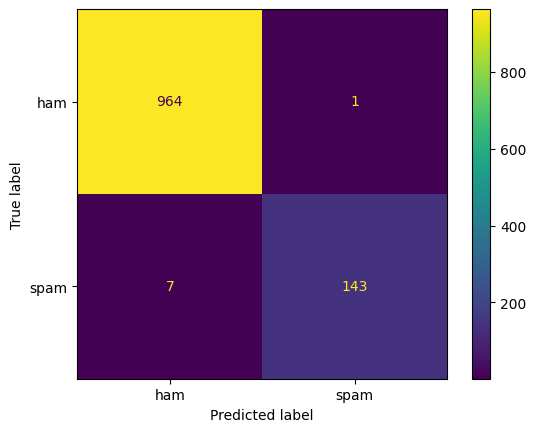

In [64]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=full_pipeline.classes_).plot()